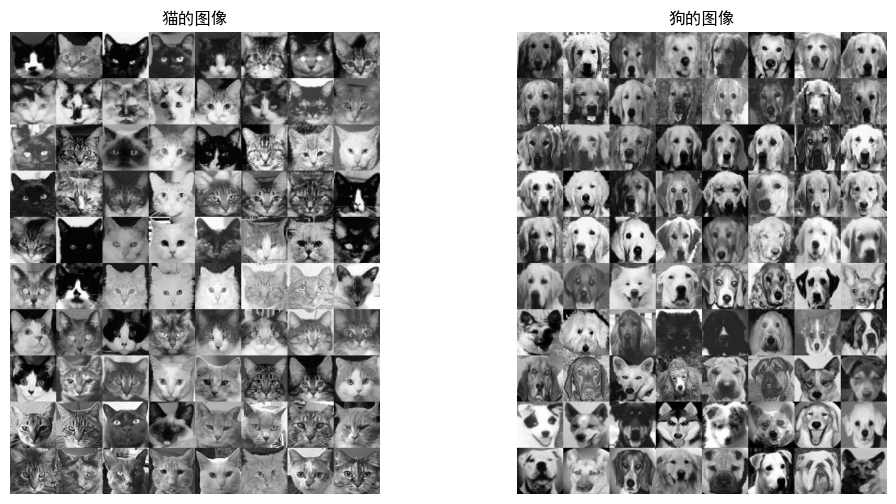

In [2]:
import scipy.io
import matplotlib.pyplot as plt
import cv2
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 

# 读取.mat文件
data = scipy.io.loadmat('D:\code\大三课程\机器学习\实验\实验三\cats.vs.dogs.mat')

cats_data = data['cats']
dogs_data = data['dogs']

# 可视化图像数据
Num_cats = cats_data.shape[3]
rows_cat = 10
cols_cat = int(Num_cats/rows_cat)

Num_dogs = dogs_data.shape[3]
rows_dog = 10
cols_dog = int(Num_cats/rows_dog)

# 创建一个列表，用于存储每个图像
cats = [cats_data[:, :, :, i] for i in range(Num_cats)]
dogs = [dogs_data[:, :, :, i] for i in range(Num_dogs)]
# 使用OpenCV的cv2.vconcat和cv2.hconcat来创建montage
montage_cats = cv2.vconcat([cv2.hconcat(cats[i:i+cols_cat]) for i in range(0, len(cats), cols_cat)])
montage_dogs = cv2.vconcat([cv2.hconcat(dogs[i:i+cols_dog]) for i in range(0, len(dogs), cols_dog)])

# 显示猫和狗的montage图像
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(montage_cats, cmap='gray')
ax1.set_title('猫的图像')
ax1.axis('off')

ax2.imshow(montage_dogs, cmap='gray')
ax2.set_title('狗的图像')
ax2.axis('off')

plt.show()


In [3]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

# 将数据重塑为 (样本数量, 特征数量)
cats_data = cats_data.reshape(80, -1)
dogs_data = dogs_data.reshape(80, -1)

# 创建标签向量，1 表示猫，-1 表示狗
cat_labels = np.ones(80)
dog_labels = -np.ones(80)

# 合并猫和狗的数据和标签
X = np.vstack((cats_data, dogs_data))
y = np.hstack((cat_labels, dog_labels))

n_components = 2
pca = PCA(n_components=n_components)
X = pca.fit_transform(X)

# 创建SVM分类器
clf = svm.SVC(kernel='linear')

# 执行交叉验证
cv_scores = cross_val_score(clf, X, y, cv=4)  # 这里使用5折交叉验证

# 打印每折的准确率
for fold, score in enumerate(cv_scores, 1):
    print(f'折 {fold} 的分类准确率：%0.2f%%' % (score * 100))

# 计算平均准确率
average_accuracy = np.mean(cv_scores)
print('平均分类准确率：%0.2f%%' % (average_accuracy * 100))

(80, 4096)
折 1 的分类准确率：67.50%
折 2 的分类准确率：70.00%
折 3 的分类准确率：50.00%
折 4 的分类准确率：27.50%
平均分类准确率：53.75%


In [10]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
from sklearn.decomposition import PCA

# 1. 数据准备
# 将图像数据重塑为 (样本数量, 特征数量)
cats_data = cats_data.reshape(80, -1)
dogs_data = dogs_data.reshape(80, -1)

# 创建标签向量，1 表示猫，-1 表示狗
cat_labels = np.ones(80)
dog_labels = -np.ones(80)

# 合并猫和狗的数据和标签
X = np.vstack((cats_data, dogs_data))
y = np.hstack((cat_labels, dog_labels))

n_components = 3

pca = PCA(n_components=n_components)
X = pca.fit_transform(X)

# # 2. 数据分割
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# # 4. 创建SVM分类器（使用RBF kernel）
# clf = svm.SVC(kernel='linear')

# # 4. 模型训练
# clf.fit(X_train, y_train)

# # 5. 模型评估
# y_pred = clf.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print('分类准确率：%0.2f%%' % (accuracy * 100))

# # 绘制数据点
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', marker='o', label='Data')




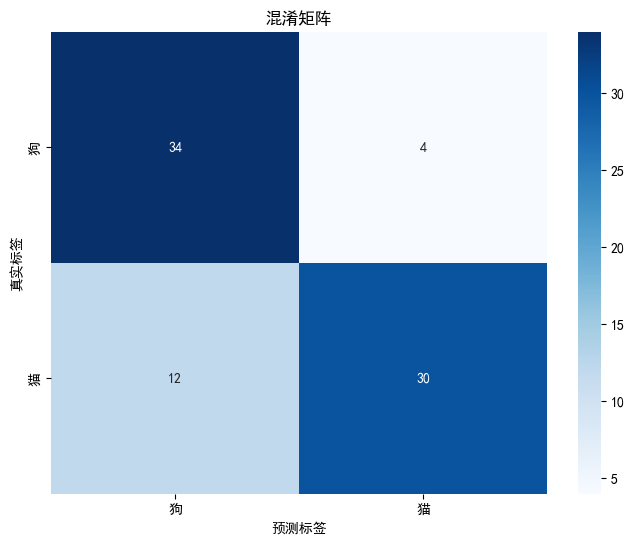

In [40]:
# # 计算混淆矩阵
# conf_matrix = confusion_matrix(y_test, y_pred)

# # 可视化混淆矩阵
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['狗', '猫'], yticklabels=['狗', '猫'])
# plt.xlabel('预测标签')
# plt.ylabel('真实标签')
# plt.title('混淆矩阵')
# plt.show()

TypeError: Input z must be 2D, not 3D

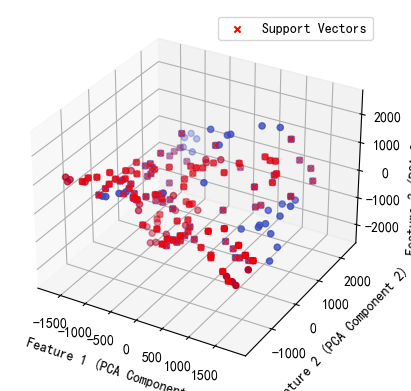

In [11]:
# 创建SVM分类器（使用RBF kernel）
clf = svm.SVC(kernel='rbf', C=1)

# 模型训练
clf.fit(X, y)

# 绘制支持向量
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制数据点
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='coolwarm')

# 绘制支持向量
support_indices = clf.support_
support_vectors = X[support_indices]
ax.scatter(support_vectors[:, 0], support_vectors[:, 1], support_vectors[:, 2], c='r', marker='x', label='Support Vectors')

# 绘制决策函数的等高线
ax.set_xlabel('Feature 1 (PCA Component 1)')
ax.set_ylabel('Feature 2 (PCA Component 2)')
ax.set_zlabel('Feature 3 (PCA Component 3)')
plt.legend()

# 绘制决策函数的等高线
xx, yy, zz = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 50),
                         np.linspace(X[:, 1].min(), X[:, 1].max(), 50),
                         np.linspace(X[:, 2].min(), X[:, 2].max(), 50))
decision_function = clf.decision_function(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
decision_function = decision_function.reshape(xx.shape)
plt.contourf(xx[:, :, 0], yy[:, :, 0], decision_function, levels=[-1, 0, 1], alpha=0.5, cmap='coolwarm')

plt.show()


